In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn import datasets
titanic_data= sns.load_dataset("titanic")
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [40]:
print("# of passengers in orginal data:" +str(len(titanic_data)))

# of passengers in orginal data:891


<Axes: xlabel='survived', ylabel='count'>

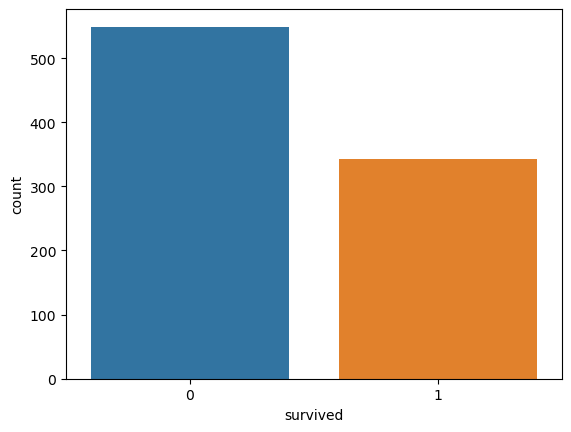

In [41]:
sns.countplot(x="survived",data=titanic_data)

<Axes: xlabel='survived', ylabel='count'>

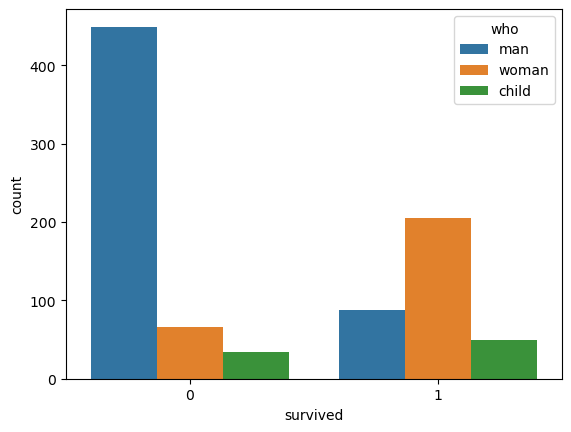

In [66]:
sns.countplot(x="survived",hue="who",data=titanic_data)

<Axes: xlabel='survived', ylabel='count'>

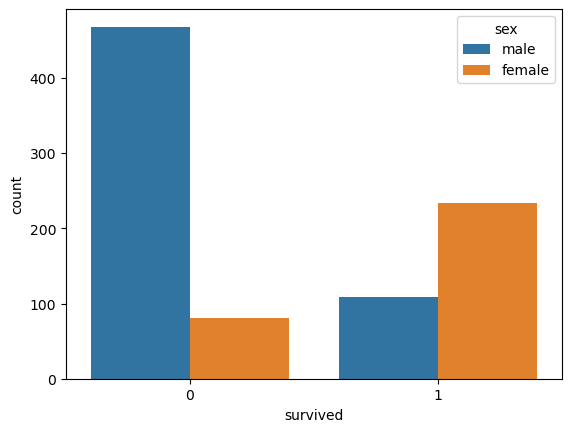

In [42]:
sns.countplot(x="survived",hue="sex",data=titanic_data)

<Axes: ylabel='Frequency'>

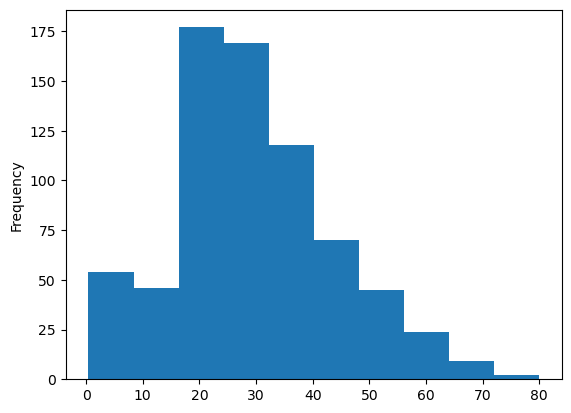

In [44]:
titanic_data["age"].plot.hist()

<Axes: xlabel='sibsp', ylabel='count'>

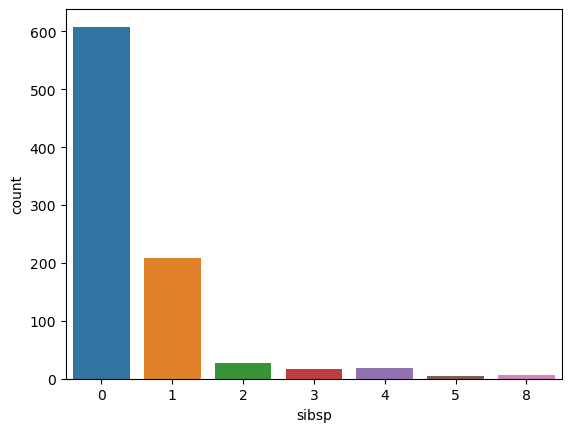

In [45]:
sns.countplot(x="sibsp",data=titanic_data)

In [46]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [47]:
titanic_data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
titanic_data.isnull().sum

<bound method DataFrame.sum of      survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  

<Axes: >

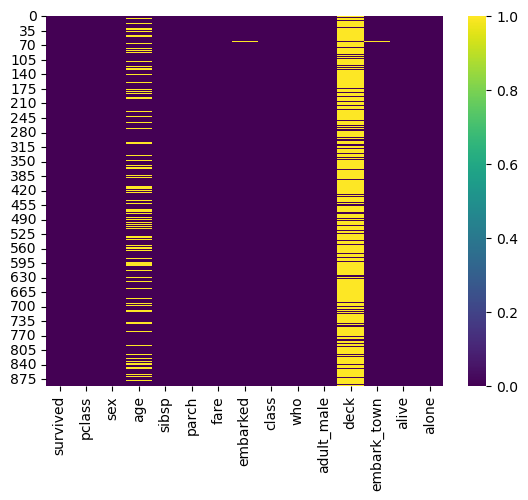

In [49]:
sns.heatmap(titanic_data.isnull(),cmap="viridis")

In [50]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

titanic_data= sns.load_dataset("titanic")

In [52]:
titanic_data.drop("age",axis=1,inplace=True)

<Axes: >

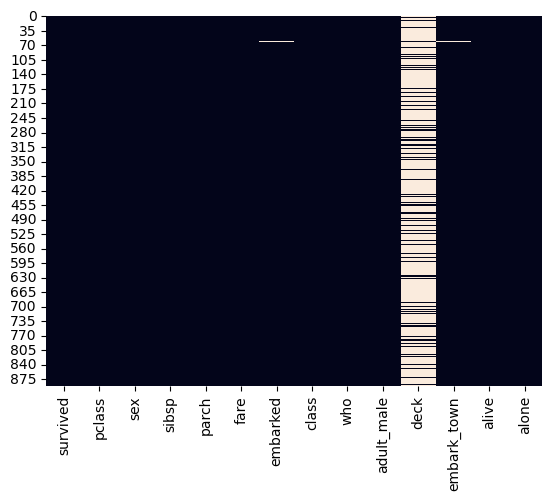

In [53]:
sns.heatmap(titanic_data.isnull(),cbar=False)

In [54]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [55]:
titanic_data.head(2)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [56]:
sex=pd.get_dummies(titanic_data["sex"],drop_first=True)
sex.head(5)

,male
0,True
1,False
2,False
3,False
4,True


In [57]:
titanic_data.head(5)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
embark=pd.get_dummies(titanic_data["embarked"])


In [59]:
embark=pd.get_dummies(titanic_data["embarked"],drop_first=True)
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [60]:
pcl=pd.get_dummies(titanic_data["pclass"],drop_first=True)
pcl.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [100]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)
titanic_data.head(5)

,sex,sibsp,fare,class,who,adult_male,embark_town,alive,alone,male,...,male,Q,S,2,3,male,Q,S,2,3
0,male,1,7.2500,Third,man,True,Southampton,no,False,True,...,True,False,True,False,True,True,False,True,False,True
1,female,1,71.2833,First,woman,False,Cherbourg,yes,False,False,...,False,False,False,False,False,False,False,False,False,False
2,female,0,7.9250,Third,woman,False,Southampton,yes,True,False,...,False,False,True,False,True,False,False,True,False,True
3,female,1,53.1000,First,woman,False,Southampton,yes,False,False,...,False,False,True,False,False,False,False,True,False,False
4,male,0,8.0500,Third,man,True,Southampton,no,True,True,...,True,False,True,False,True,True,False,True,False,True


In [105]:
titanic_data.drop(['sibsp','fare'],axis=1,inplace=True)
titanic_data.head()

,sex,class,who,adult_male,embark_town,alive,alone,male,Q,S,...,male,Q,S,2,3,male,Q,S,2,3
0,male,Third,man,True,Southampton,no,False,True,False,True,...,True,False,True,False,True,True,False,True,False,True
1,female,First,woman,False,Cherbourg,yes,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,female,Third,woman,False,Southampton,yes,True,False,False,True,...,False,False,True,False,True,False,False,True,False,True
3,female,First,woman,False,Southampton,yes,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,male,Third,man,True,Southampton,no,True,True,False,True,...,True,False,True,False,True,True,False,True,False,True


In [79]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel=LogisticRegression()

In [131]:
perdictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [130]:
from sklearn import classification_report

ImportError: cannot import name 'classification_report' from 'sklearn' (/Users/sounakbhowal/anaconda3/lib/python3.11/site-packages/sklearn/__init__.py)

In [125]:
classification_report(y_test,predictions)

NameError: name 'predictions' is not defined